In [1]:
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
sns.set(style="ticks", color_codes=True)

In [3]:
df = pd.read_csv('abalone.data', header=None, names=['Sex', 'Length', 'Diameter', 'Height', 'Whole', 'Shucked', 'Viscera', 'Shell', 'Rings'])

In [4]:
df.head()

Sex  Length  Diameter  Height   Whole  Shucked  Viscera  Shell  Rings
0   M   0.455     0.365   0.095  0.5140   0.2245   0.1010  0.150     15
1   M   0.350     0.265   0.090  0.2255   0.0995   0.0485  0.070      7
2   F   0.530     0.420   0.135  0.6770   0.2565   0.1415  0.210      9
3   M   0.440     0.365   0.125  0.5160   0.2155   0.1140  0.155     10
4   I   0.330     0.255   0.080  0.2050   0.0895   0.0395  0.055      7

In [5]:
df.describe()

Length     Diameter       Height        Whole      Shucked  \
count  4177.000000  4177.000000  4177.000000  4177.000000  4177.000000   
mean      0.523992     0.407881     0.139516     0.828742     0.359367   
std       0.120093     0.099240     0.041827     0.490389     0.221963   
min       0.075000     0.055000     0.000000     0.002000     0.001000   
25%       0.450000     0.350000     0.115000     0.441500     0.186000   
50%       0.545000     0.425000     0.140000     0.799500     0.336000   
75%       0.615000     0.480000     0.165000     1.153000     0.502000   
max       0.815000     0.650000     1.130000     2.825500     1.488000   

           Viscera        Shell        Rings  
count  4177.000000  4177.000000  4177.000000  
mean      0.180594     0.238831     9.933684  
std       0.109614     0.139203     3.224169  
min       0.000500     0.001500     1.000000  
25%       0.093500     0.130000     8.000000  
50%       0.171000     0.234000     9.000000  
75%       0.253000     0.329000    11.000000  
max       0.760000     1.005000    29.000000

In [6]:
df.groupby(['Rings']).count()

Sex  Length  Diameter  Height  Whole  Shucked  Viscera  Shell
Rings                                                               
1        1       1         1       1      1        1        1      1
2        1       1         1       1      1        1        1      1
3       15      15        15      15     15       15       15     15
4       57      57        57      57     57       57       57     57
5      115     115       115     115    115      115      115    115
6      259     259       259     259    259      259      259    259
7      391     391       391     391    391      391      391    391
8      568     568       568     568    568      568      568    568
9      689     689       689     689    689      689      689    689
10     634     634       634     634    634      634      634    634
11     487     487       487     487    487      487      487    487
12     267     267       267     267    267      267      267    267
13     203     203       203     203    203      203      203    203
14     126     126       126     126    126      126      126    126
15     103     103       103     103    103      103      103    103
16      67      67        67      67     67       67       67     67
17      58      58        58      58     58       58       58     58
18      42      42        42      42     42       42       42     42
19      32      32        32      32     32       32       32     32
20      26      26        26      26     26       26       26     26
21      14      14        14      14     14       14       14     14
22       6       6         6       6      6        6        6      6
23       9       9         9       9      9        9        9      9
24       2       2         2       2      2        2        2      2
25       1       1         1       1      1        1        1      1
26       1       1         1       1      1        1        1      1
27       2       2         2       2      2        2        2      2
29       1       1         1       1      1        1        1      1

In [7]:
df.dtypes

Sex          object
Length      float64
Diameter    float64
Height      float64
Whole       float64
Shucked     float64
Viscera     float64
Shell       float64
Rings         int64
dtype: object

In [8]:
df.loc[:, ['Sex', 'Length']].groupby('Sex').count()

Length
Sex        
F      1307
I      1342
M      1528

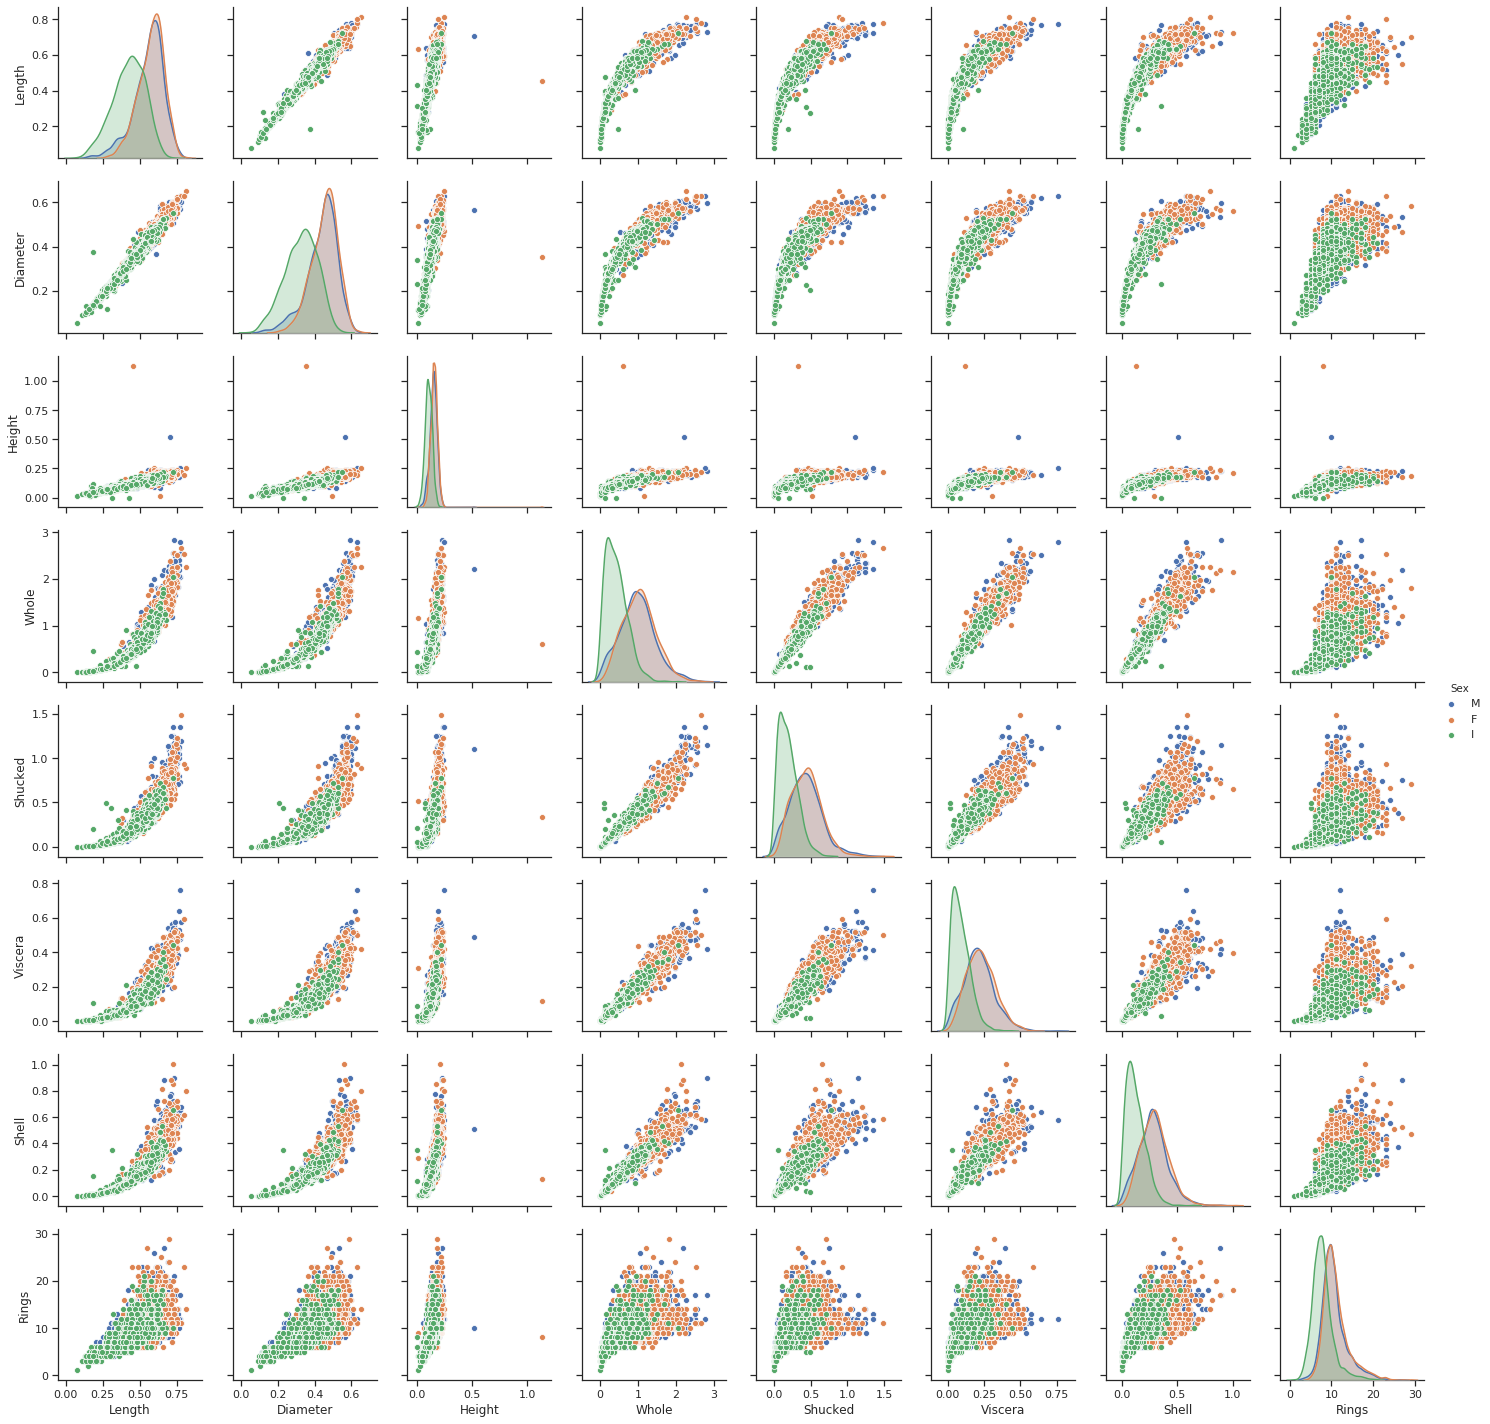

In [9]:
g = sns.pairplot(df, hue="Sex")

/home/pavel/.miniconda3/envs/scales/lib/python3.7/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/pavel/.miniconda3/envs/scales/lib/python3.7/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/pavel/.miniconda3/envs/scales/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/home/pavel/.miniconda3/envs/scales/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


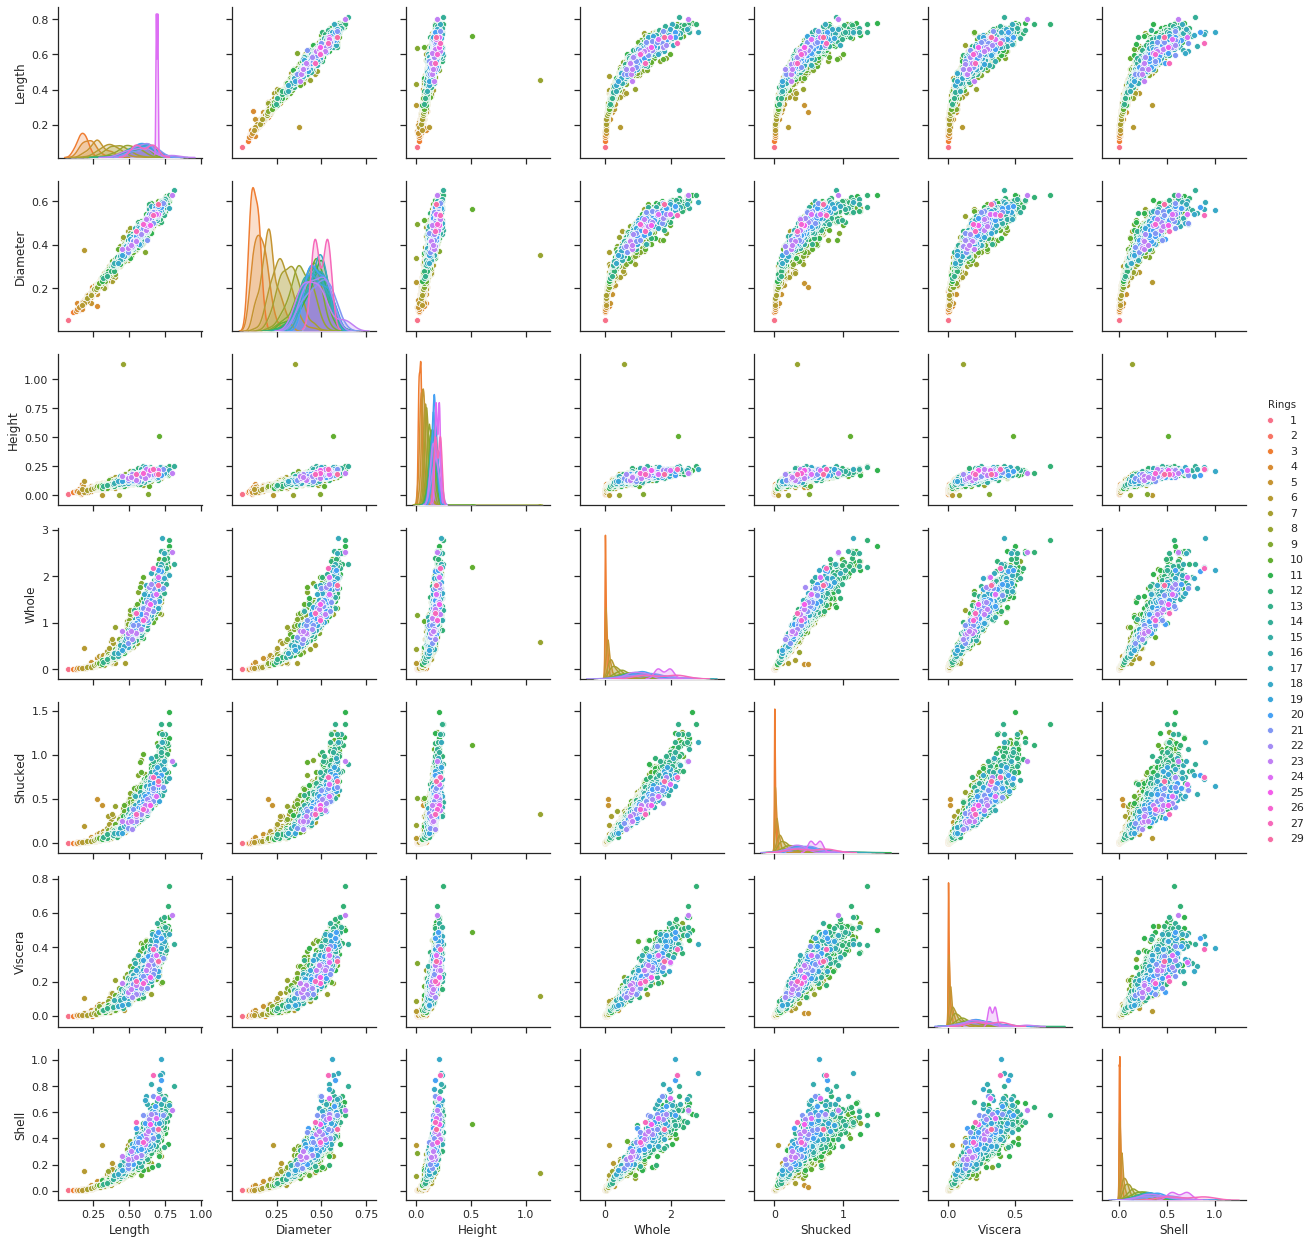

In [10]:
g = sns.pairplot(df, vars=['Length', 'Diameter', 'Height', 'Whole', 'Shucked', 'Viscera', 'Shell'], hue="Rings")

## Looking at the data
Ok, so after making couple of plot graphs, I made a decision: I will predict genders instead.
This is not because I am weasling out of a complicated problem, but the graphs that's presented in terms of 'Sex', I realised that the problem looks much more simpler but a bit difficult. This is because even though the pairpot (the first one with the sex hue) shows that there clearly displayed groups, it is not truthfully representative since there are plenty of males just almost as much as infant and female sex and yet they are not displayed in 'majority' fashion. So I will investigate :)

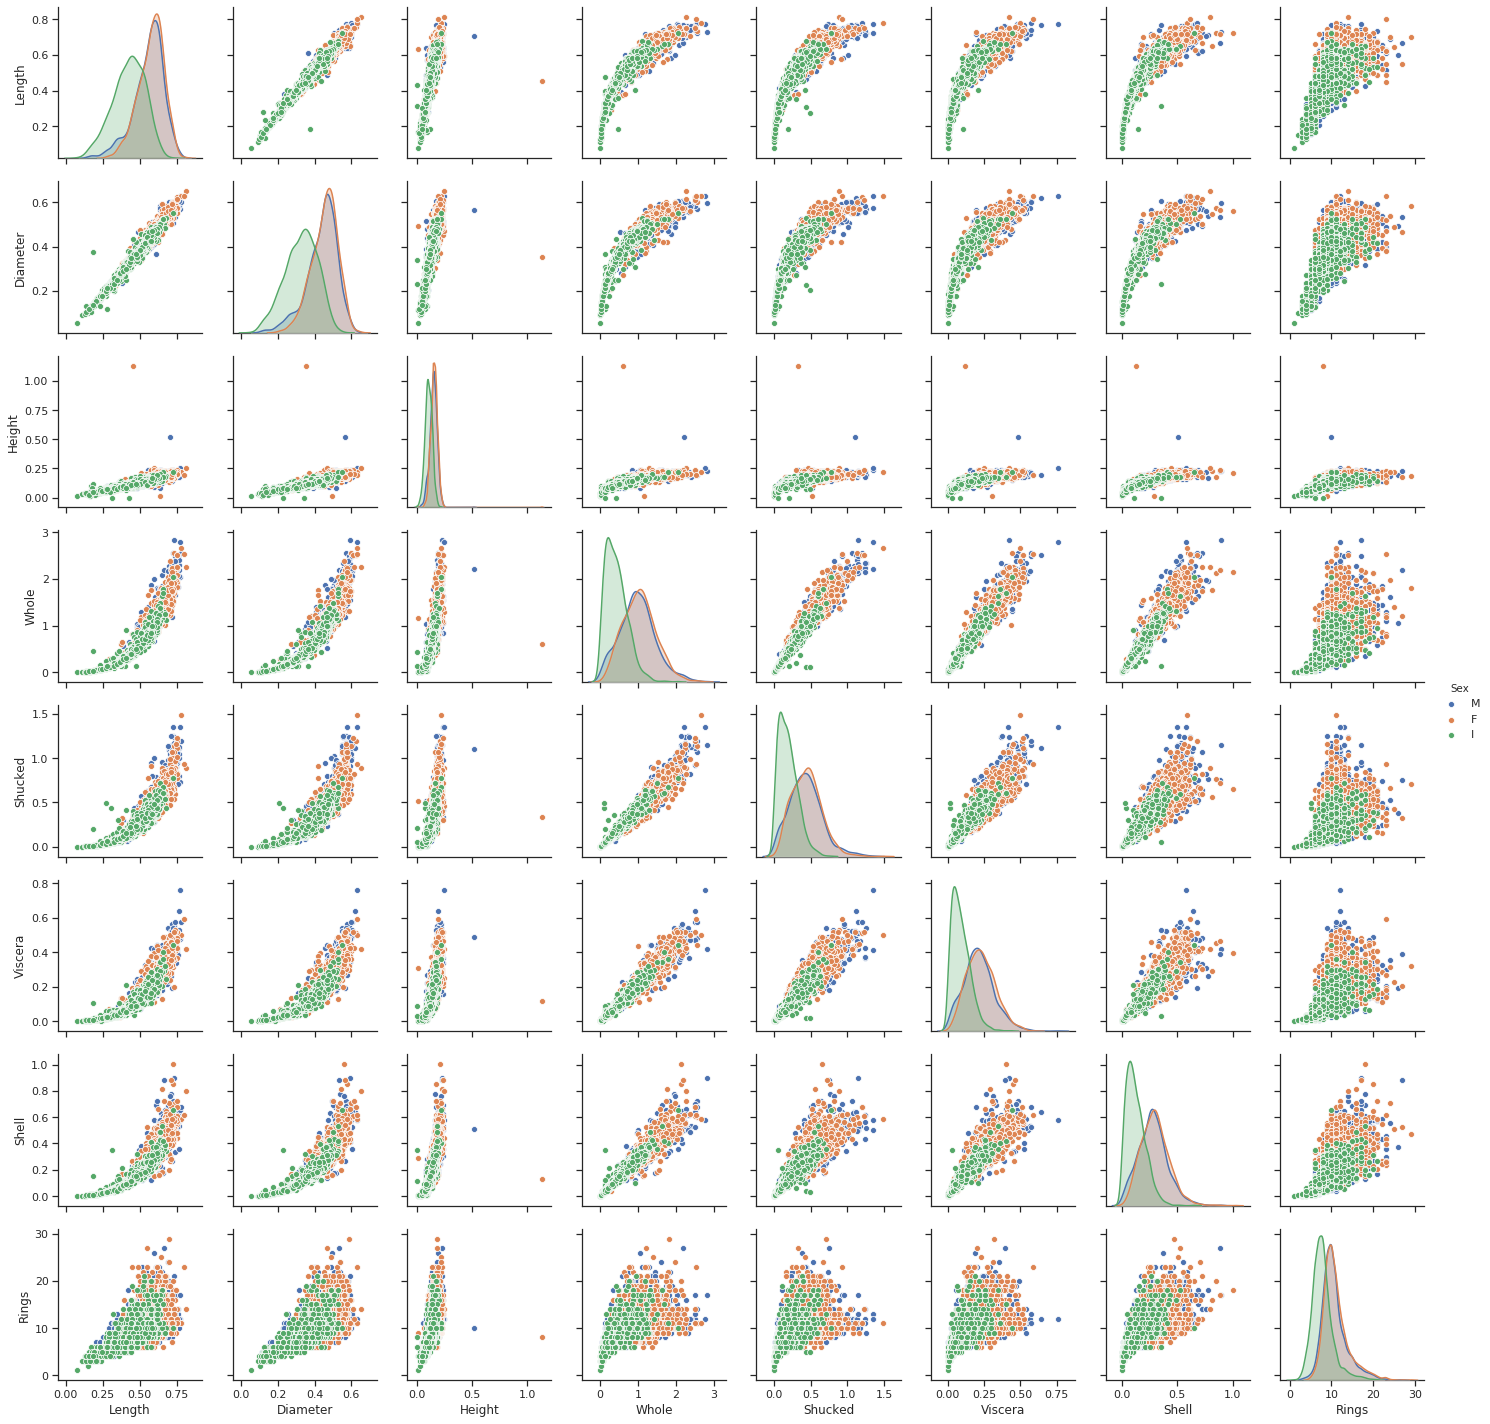

In [17]:
# Ok back to it.
g = sns.pairplot(df, hue="Sex")

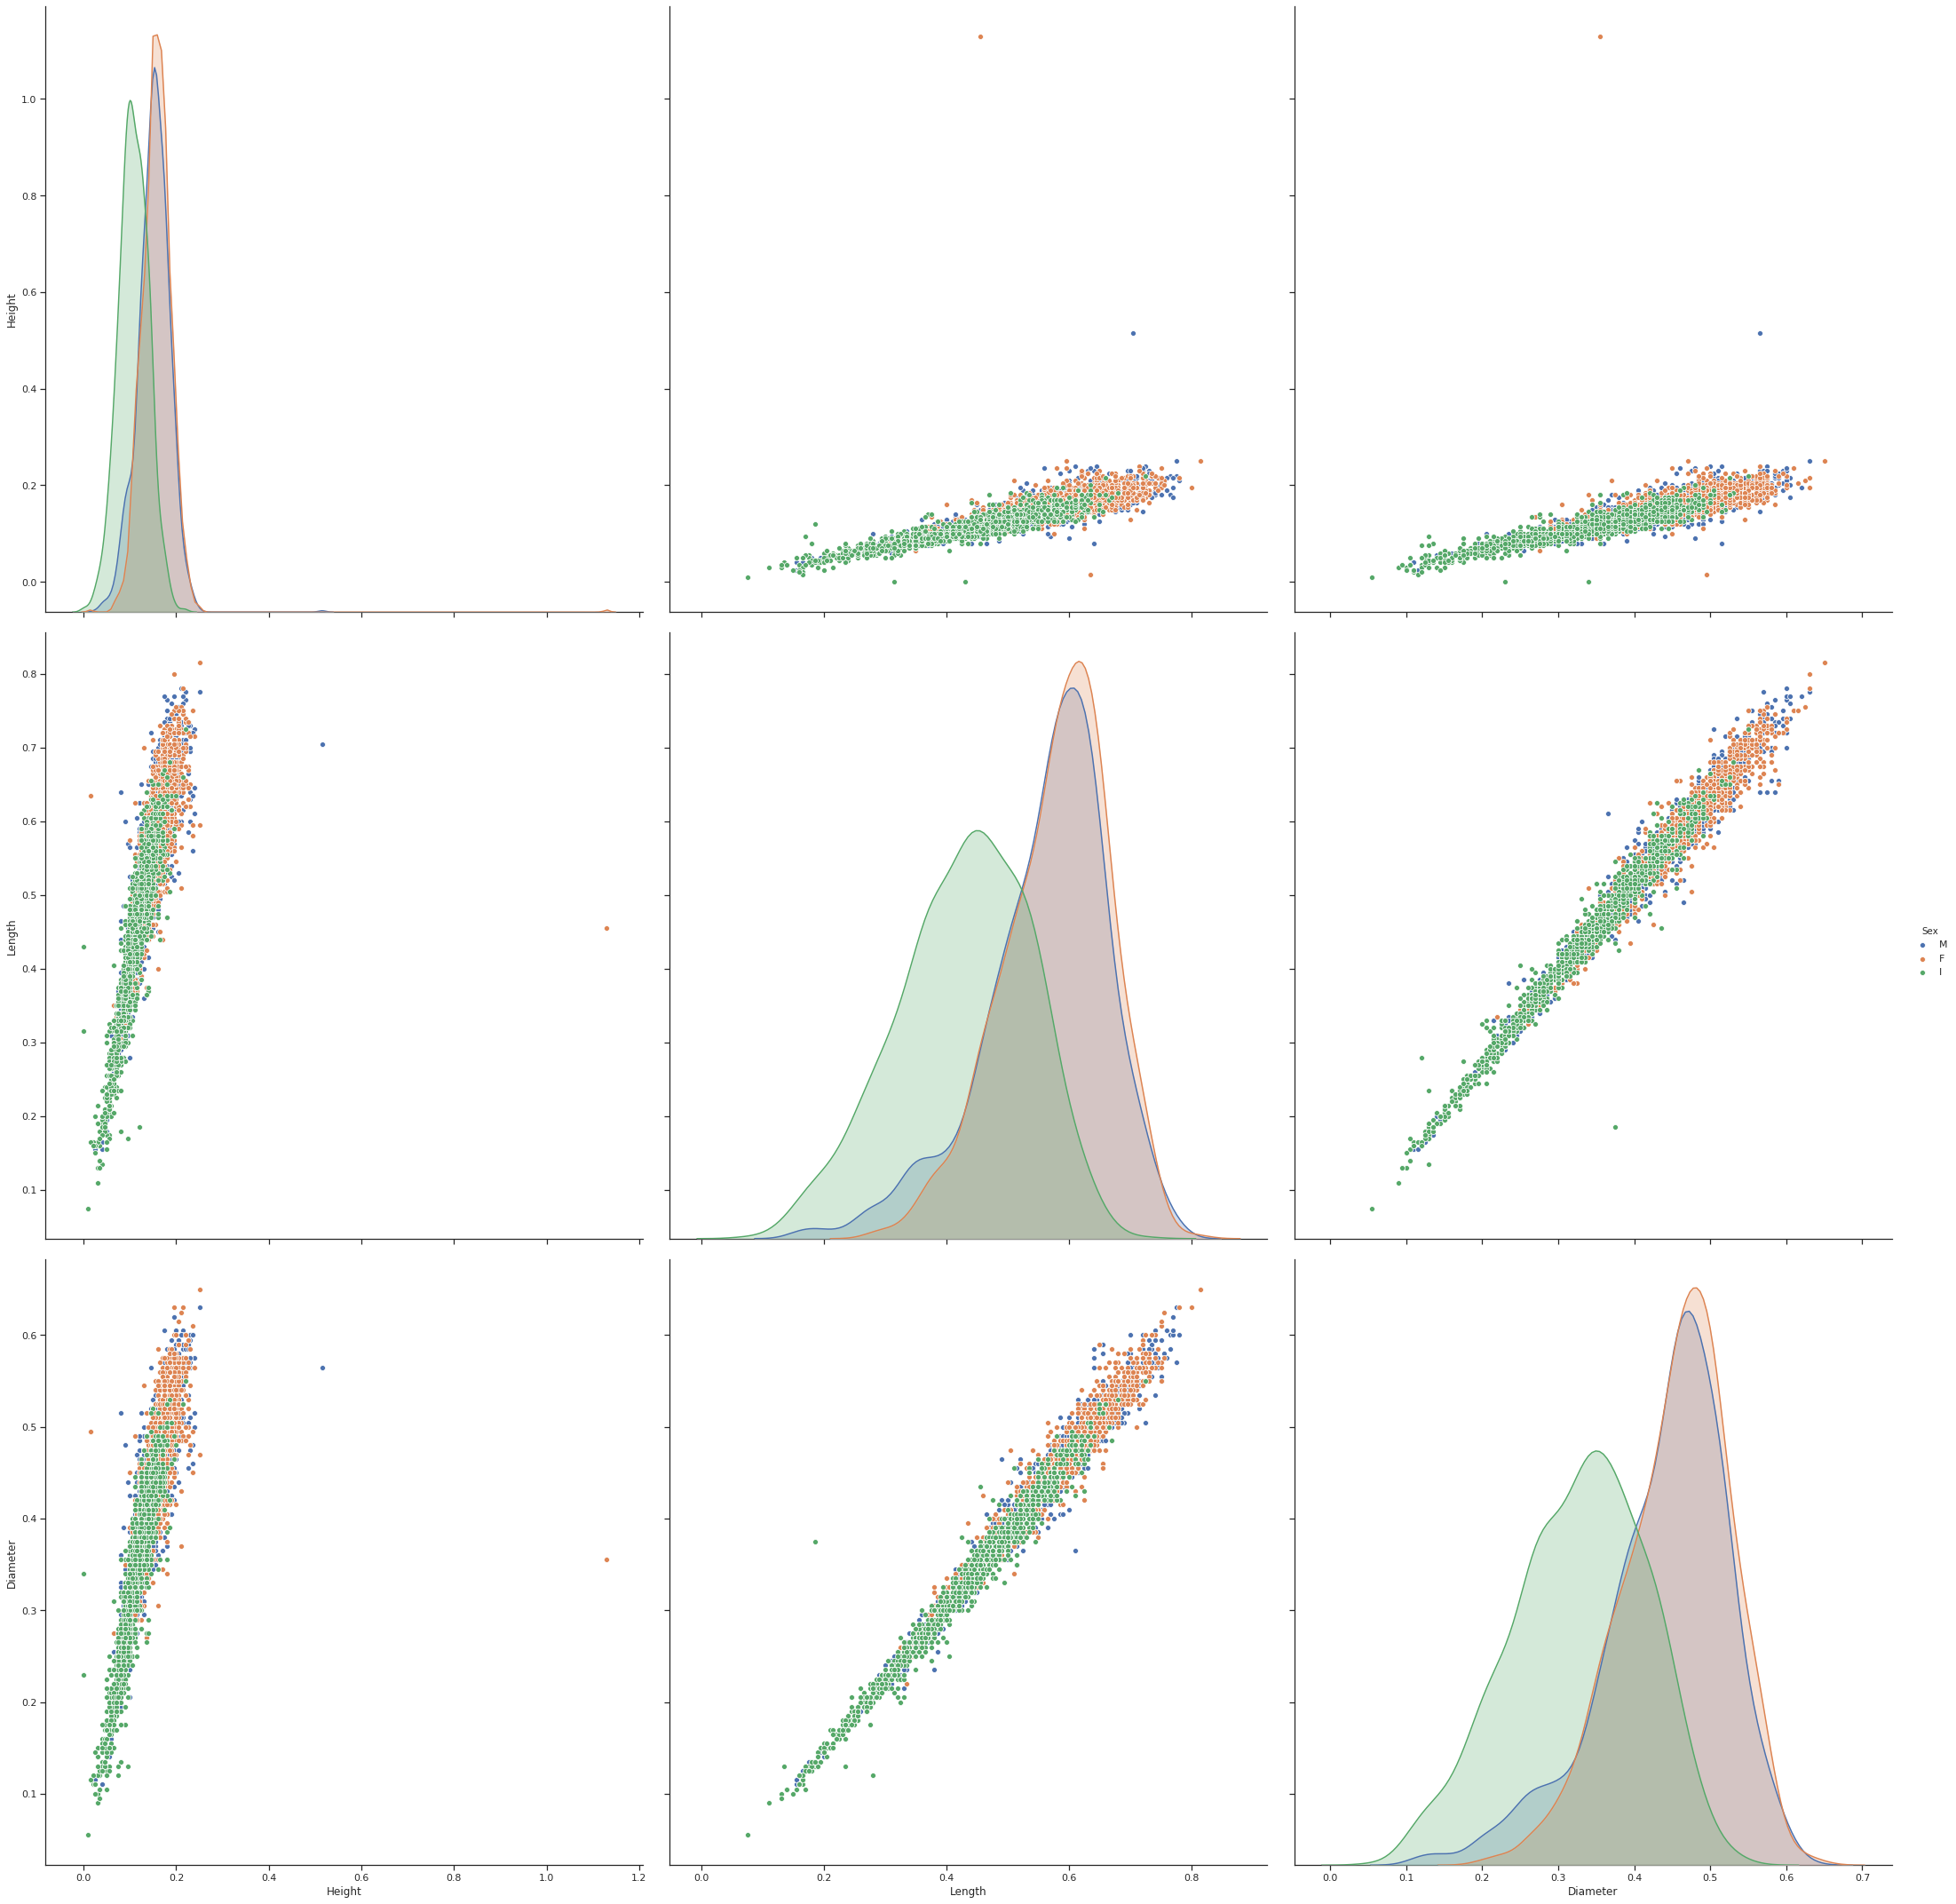

In [9]:
#Let's explore the relationship between height, diameter and length
g = sns.pairplot(df.loc[:, ["Height", "Length", "Diameter", "Sex"]], hue="Sex", height=10)

Ok, by the looks of it, the distribution of values for 'Male' sex is literally identical to 'Female' one. As for the 'infant' sex, it looks there's a distinct distribution because the frequency of lower **diameter**, **length** and **height** values are a lot more higher compared to other two sexes, but after its high peak, frequency of bigger values fall within distribution of 'Male' and 'Female' sexes.

Now let's explore the weights.

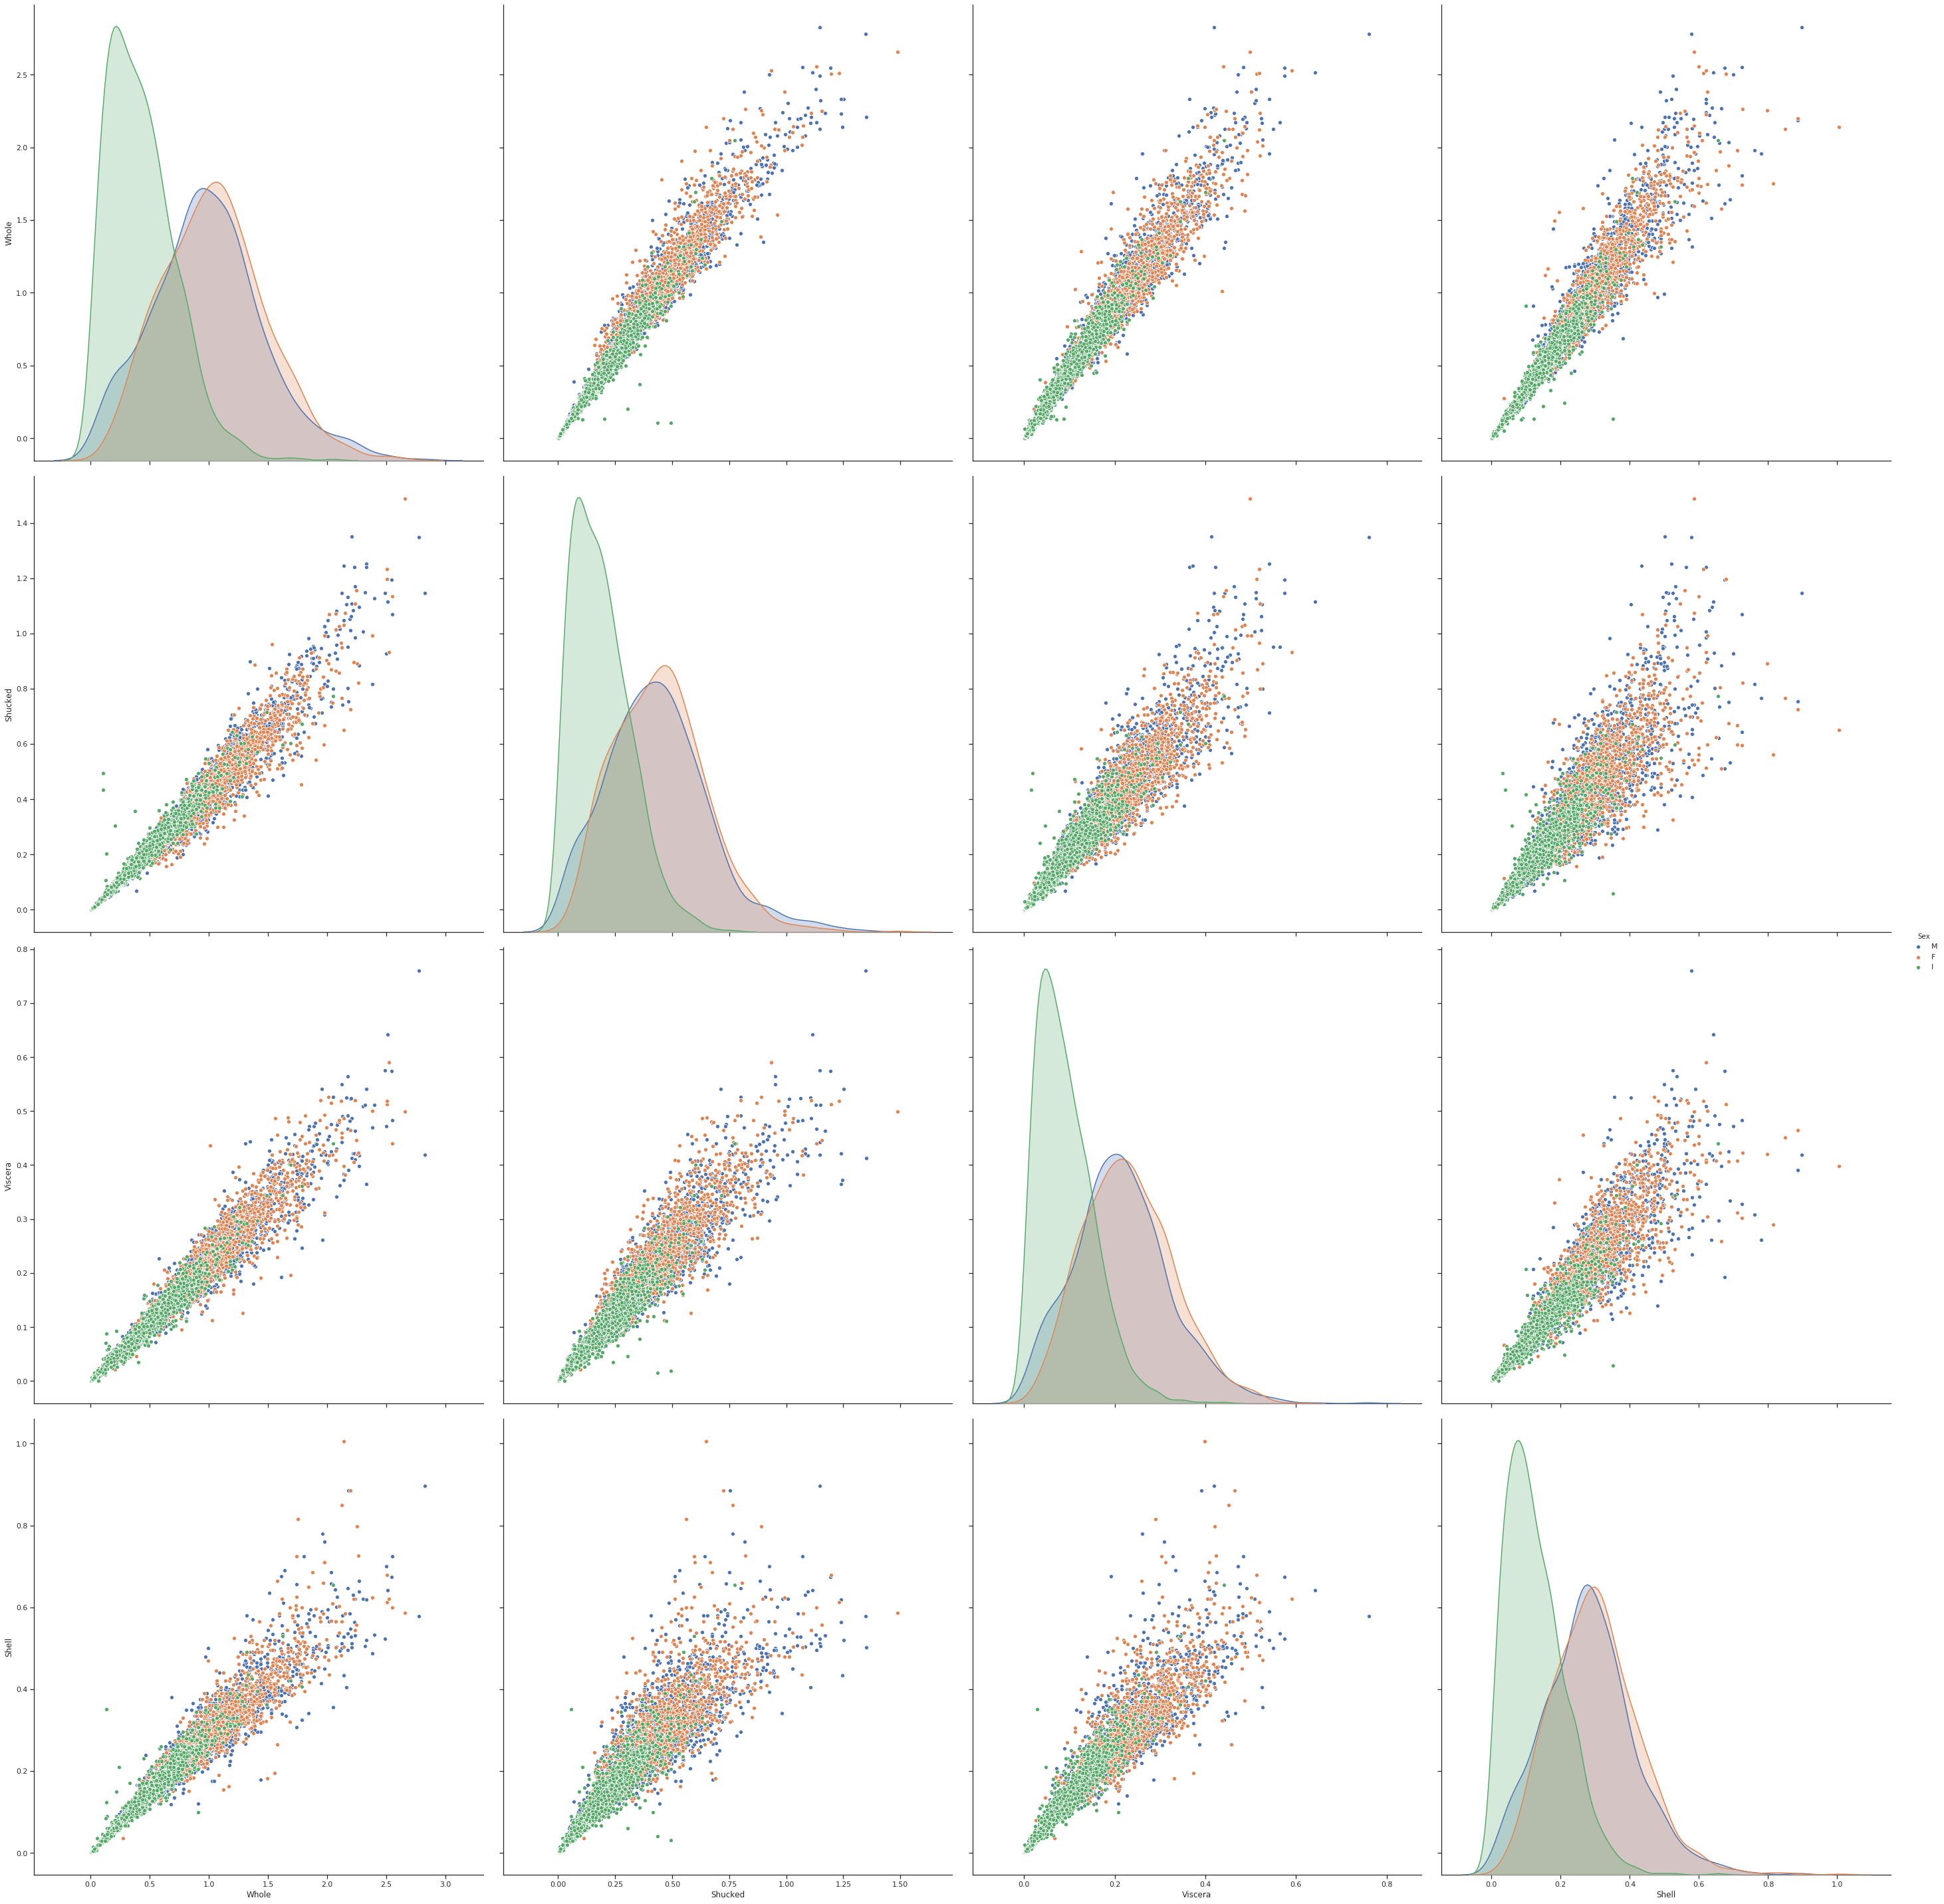

In [10]:
g = sns.pairplot(df.loc[:, ["Whole", "Shucked", "Viscera", "Shell", "Sex"]], hue="Sex", height=10)